<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [4]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [5]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
host_id                                             0
host_name                                         857
host_since                                        914
host_location                                    6237
host_about                                      11237
host_response_time                               4686
host_response_rate                               4686
host_acceptance_rate                             3610
host_is_superhost                                1359
host_neighbourhood                              12831
host_listings_count                               914
host_total_listings_count                         914
host_has_profile_pic                              914
host_identity_verified      

In [6]:
#Calculamos el numero total de la población "n"
Mexico['reviews_per_month']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
23028 non-null  float64
dtypes: float64(1)
memory usage: 206.4 KB


In [7]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['reviews_per_month'].max()
Min=Mexico['reviews_per_month'].min()
Limites= [Min, Max]
Limites

[0.01, 80.38]

In [8]:
#Calculamos el rango R
R=Max-Min
R

80.36999999999999

In [9]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [10]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

5.1257097857096365

**Creación de Categorias a partir de clases**

In [11]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(0, 80.1, 16)
intervalos

array([ 0.  ,  5.34, 10.68, 16.02, 21.36, 26.7 , 32.04, 37.38, 42.72,
       48.06, 53.4 , 58.74, 64.08, 69.42, 74.76, 80.1 ])

In [12]:
#Creamos las categorías 
categorias= ["Categoría1 (0-5.3 reviews_per_month)", "Categoría2 (5.4-10.6 reviews_per_month)","Categoría3 (10.7-16 reviews_per_month)", "Categoría4 (16.1-21.3 reviews_per_month)",
             "Categoría5 (21.4-26.7 reviews_per_month)", "Categoría6 (26.8-32 reviews_per_month)","Categoría7 (33-37.3 reviews_per_month)", "Categoría8 (37.4-42.7 reviews_per_month)", "Categoría9 (42.8-48 reviews_per_month)", "Categoría10 (49-53.4 reviews_per_month)","Categoría11 (53.5-58.7 reviews_per_month)", "Categoría12 (58.8-64 reviews_per_month)",
             "Categoría13 (64.1-69 reviews_per_month)", "Categoría14 (70-74.7 reviews_per_month)","Categoría15 (74.8-80.1 reviews_per_month)"
             ]

In [13]:
#Finalmente creamos las categorías en la columna numérica
Mexico['reviews_per_month']=pd.cut(x= Mexico['reviews_per_month'], bins=intervalos, labels= categorias)
Mexico['reviews_per_month']

0                                             NaN
1            Categoría1 (0-5.3 reviews_per_month)
2            Categoría1 (0-5.3 reviews_per_month)
3            Categoría1 (0-5.3 reviews_per_month)
4            Categoría1 (0-5.3 reviews_per_month)
5                                             NaN
6            Categoría1 (0-5.3 reviews_per_month)
7            Categoría1 (0-5.3 reviews_per_month)
8            Categoría1 (0-5.3 reviews_per_month)
9            Categoría1 (0-5.3 reviews_per_month)
10           Categoría1 (0-5.3 reviews_per_month)
11           Categoría1 (0-5.3 reviews_per_month)
12           Categoría1 (0-5.3 reviews_per_month)
13           Categoría1 (0-5.3 reviews_per_month)
14           Categoría1 (0-5.3 reviews_per_month)
15           Categoría1 (0-5.3 reviews_per_month)
16           Categoría1 (0-5.3 reviews_per_month)
17           Categoría1 (0-5.3 reviews_per_month)
18           Categoría1 (0-5.3 reviews_per_month)
19           Categoría1 (0-5.3 reviews_per_month)


In [14]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['reviews_per_month'].value_counts().reset_index()
Tabla_freq

reviews_per_month  count
0        Categoría1 (0-5.3 reviews_per_month)  21978
1     Categoría2 (5.4-10.6 reviews_per_month)    941
2      Categoría3 (10.7-16 reviews_per_month)     66
3    Categoría4 (16.1-21.3 reviews_per_month)     20
4    Categoría5 (21.4-26.7 reviews_per_month)      9
5      Categoría6 (26.8-32 reviews_per_month)      6
6      Categoría7 (33-37.3 reviews_per_month)      3
7      Categoría9 (42.8-48 reviews_per_month)      2
8    Categoría8 (37.4-42.7 reviews_per_month)      1
9     Categoría10 (49-53.4 reviews_per_month)      1
10  Categoría11 (53.5-58.7 reviews_per_month)      0
11    Categoría12 (58.8-64 reviews_per_month)      0
12    Categoría13 (64.1-69 reviews_per_month)      0
13    Categoría14 (70-74.7 reviews_per_month)      0
14  Categoría15 (74.8-80.1 reviews_per_month)      0

In [15]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

reviews_per_month  count
0      Categoría1 (0-5.3 reviews_per_month)  21978
1   Categoría2 (5.4-10.6 reviews_per_month)    941
2    Categoría3 (10.7-16 reviews_per_month)     66
3  Categoría4 (16.1-21.3 reviews_per_month)     20
4  Categoría5 (21.4-26.7 reviews_per_month)      9
5    Categoría6 (26.8-32 reviews_per_month)      6
6    Categoría7 (33-37.3 reviews_per_month)      3
7    Categoría9 (42.8-48 reviews_per_month)      2
8  Categoría8 (37.4-42.7 reviews_per_month)      1
9   Categoría10 (49-53.4 reviews_per_month)      1

In [16]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('reviews_per_month')
Filtro_index

count
reviews_per_month                              
Categoría1 (0-5.3 reviews_per_month)      21978
Categoría2 (5.4-10.6 reviews_per_month)     941
Categoría3 (10.7-16 reviews_per_month)       66
Categoría4 (16.1-21.3 reviews_per_month)     20
Categoría5 (21.4-26.7 reviews_per_month)      9
Categoría6 (26.8-32 reviews_per_month)        6
Categoría7 (33-37.3 reviews_per_month)        3
Categoría9 (42.8-48 reviews_per_month)        2
Categoría8 (37.4-42.7 reviews_per_month)      1
Categoría10 (49-53.4 reviews_per_month)       1

Text(0, 0.5, 'Frecuencia')

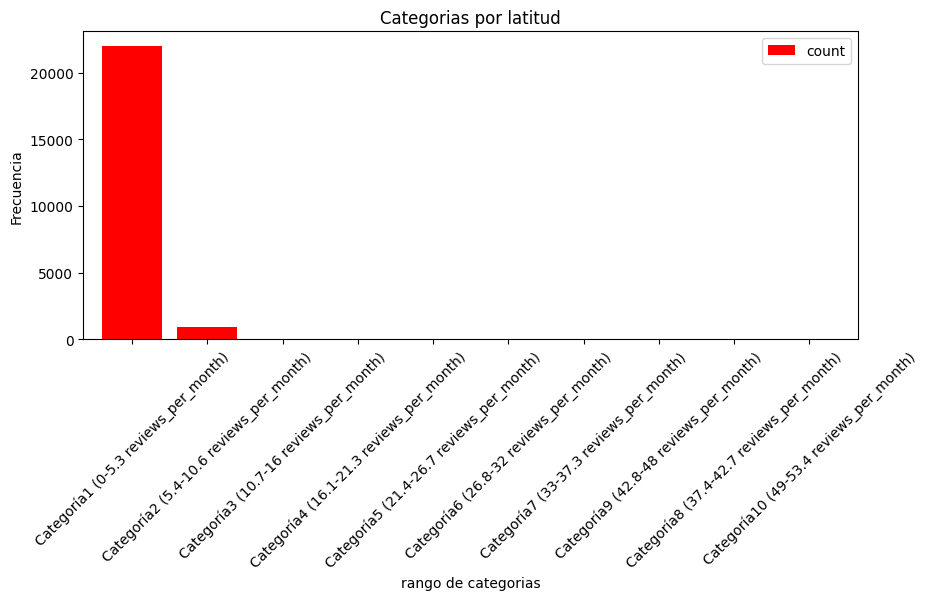

In [17]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')